In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [45]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.array([10, 110, 5, 120])
data= np.concatenate([data,outliers])


In [46]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [47]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


**Detecting oulers using scatter plot**

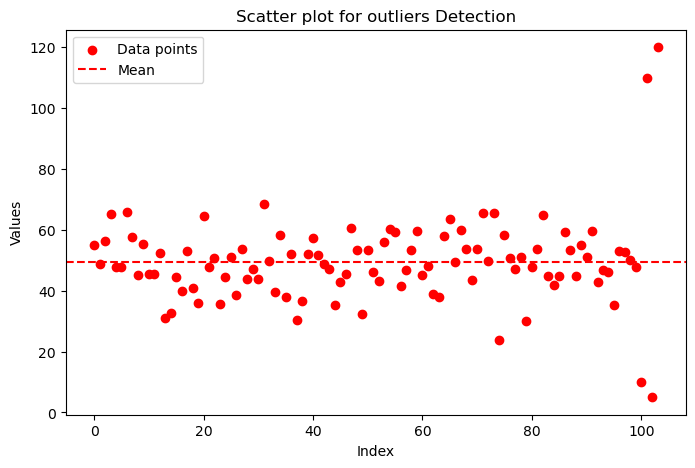

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(range(len(df)), df['Values'], color='red', label='Data points')
plt.axhline(y=df['Values'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outliers Detection")
plt.legend()
plt.show()

<ins>**A box plot is useful for spotting extremen values using quartiles**<ins>

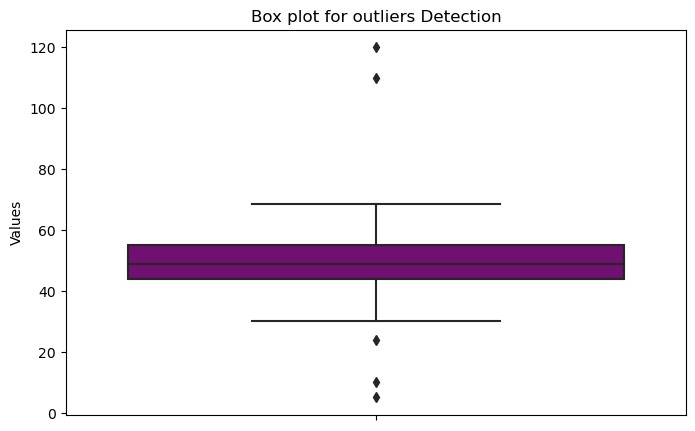

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Values',color='purple')
plt.title("Box plot for outliers Detection")
plt.show()

In [50]:
from scipy.stats import zscore
df.head()
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')

print(df[df['Outlier_Z'] == 'Outlier'])


     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


In [51]:
print(df[['Values', 'Z-score']].head())

      Values   Z-score
0  54.967142  0.395399
1  48.617357 -0.058371
2  56.476885  0.503289
3  65.230299  1.128828
4  47.658466 -0.126896


In [56]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if(x<lower_bound or x> upper_bound)else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score Outlier_Z Outer_IQR Outlier_IQR
74    23.802549 -1.831694    Normal   Outlier     Outlier
100   10.000000 -2.818056    Normal   Outlier     Outlier
101  110.000000  4.328173   Outlier   Outlier     Outlier
102    5.000000 -3.175368   Outlier   Outlier     Outlier
103  120.000000  5.042796   Outlier   Outlier     Outlier


Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

he Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [57]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.array([10, 110, 5, 120])
data= np.concatenate([data,outliers])

Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]

print(f"5-Number Summary:\nMin{min_value},Q1:{Q1},Median(Q2),Q3:{Q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound:{lower_bound},Upper BVound:{upper_bound}")
print(f"Outliers:{outliers}")

5-Number Summary:
Min5.0,Q1:43.874401021766715,Median(Q2),Q3:55.00852473036764,Max:120.0
IQR:11.134123708600924
Lower Bound:27.17321545886533,Upper BVound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
